In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
max(runs_bp_smo['metrics.acc'])

10


0.6141

In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "least_confident", "kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
max(runs_bp_lmo['metrics.acc'])

10


0.5917

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "least_confident", "kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)
max(runs_centroids['metrics.acc'])

15


0.5899

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "kmeans",1000, 30, 0.01, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
max(runs_bp_clusterwise['metrics.acc'])

10


0.6159

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters"],[True, True, True, True, True, True, True],["boundary_points", "least_confident", "kmeans",1000, 0.01, 30, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary)
max(runs_boundary['metrics.acc'])

10


0.5784

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
run_ids_random = get_run_ids(runs_random)
max(runs_random['metrics.acc'])

10


0.607

In [9]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.uncertainty"],[True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, "least_confident"])
print(len(runs_random_uncertainty))
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty)
max(runs_random_uncertainty['metrics.acc'])

10


0.5851

In [8]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)

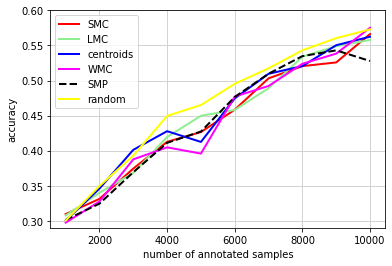

In [9]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

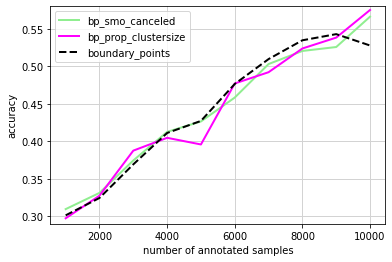

In [10]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [11]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.30958 0.33122 0.37445 0.41258 0.4265  0.45837 0.50307 0.52051 0.52577
 0.56624]
bp_lmo: [0.30763 0.33999 0.36827 0.41942 0.44966 0.45804 0.48904 0.5339  0.54889
 0.55776]


In [12]:
avg_accs_centroids

array([0.30021, 0.34596, 0.40118, 0.42774, 0.41244, 0.4745 , 0.50954,
       0.52056, 0.55029, 0.56244])

In [13]:
avg_accs_clusterwise

array([0.29735, 0.32754, 0.38759, 0.40468, 0.39581, 0.47716, 0.49219,
       0.52382, 0.53832, 0.57515])

In [14]:
avg_accs_bp_lmo

array([0.30763, 0.33999, 0.36827, 0.41942, 0.44966, 0.45804, 0.48904,
       0.5339 , 0.54889, 0.55776])

In [15]:
avg_accs_bp_smo

array([0.30958, 0.33122, 0.37445, 0.41258, 0.4265 , 0.45837, 0.50307,
       0.52051, 0.52577, 0.56624])

In [16]:
avg_accs_boundary

array([0.30128, 0.32447, 0.36927, 0.41112, 0.42723, 0.47651, 0.50969,
       0.53475, 0.54296, 0.52781])

In [17]:
avg_accs_random

array([0.30021, 0.34958, 0.39294, 0.44946, 0.46501, 0.49528, 0.51731,
       0.543  , 0.56033, 0.57283])